In [1]:
# This lets us refresh changes from other .py files without having to restart the notebook
%load_ext autoreload
%autoreload 2

In [6]:
from audioDataset import AudioDataset
from utils import *
from scipy.io import wavfile
import os
from scipy.signal import stft, istft, check_NOLA # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html
from dimensionalityReduction import decomposeAudioSKLearn, decomposeAudio, getPCA
from hmmlearn import hmm
from sklearn.preprocessing import LabelEncoder
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore") # To ignore the warnings hmmlearn causes
from sklearn.mixture import GaussianMixture
import IPython


dict_keys(['keyboard', 'string'])
[321, 814]
dict_keys(['keyboard', 'string'])
[79, 98]
{'window': 'hann', 'nperseg': 1024, 'noverlap': 256}


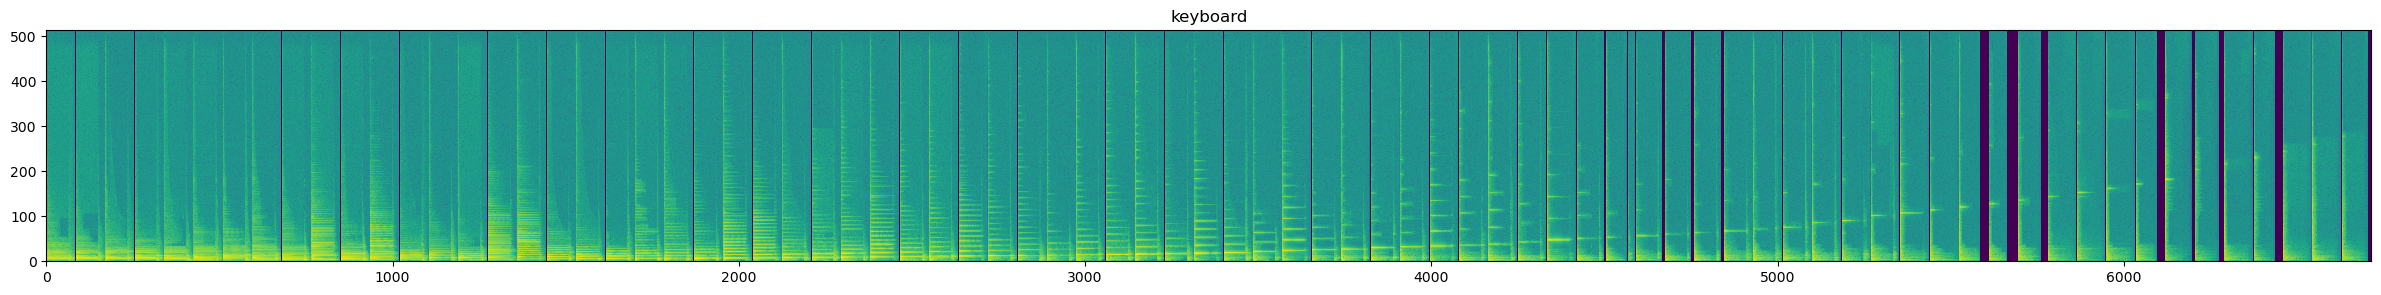

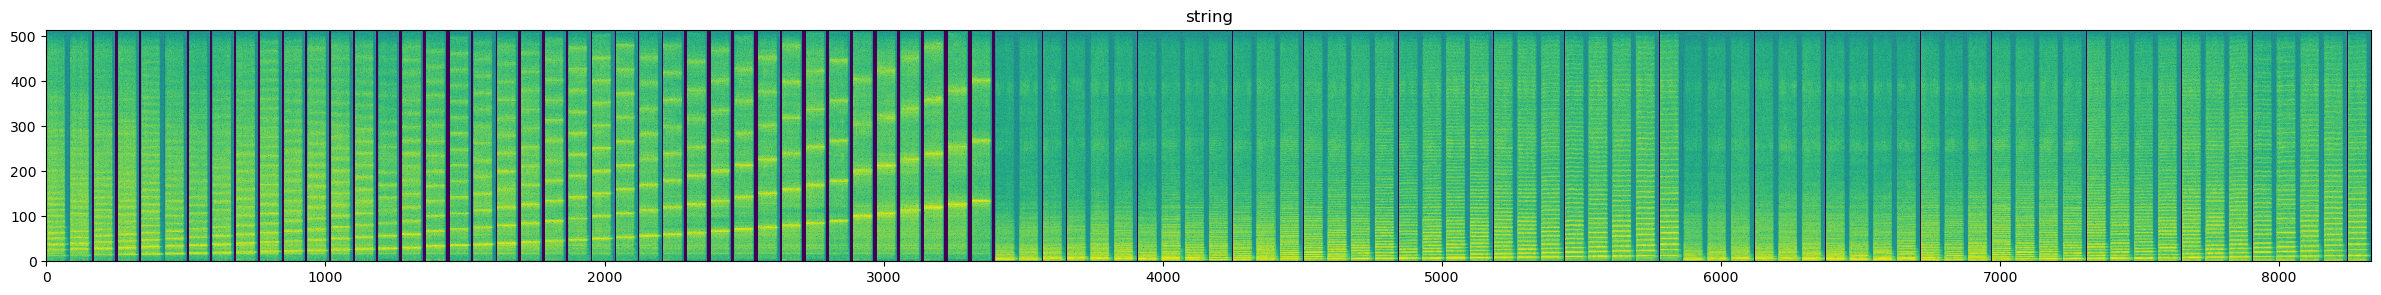

keyboard has 6715 frames
Pruned 300 frames from keyboard
string has 8330 frames
Pruned 415 frames from string


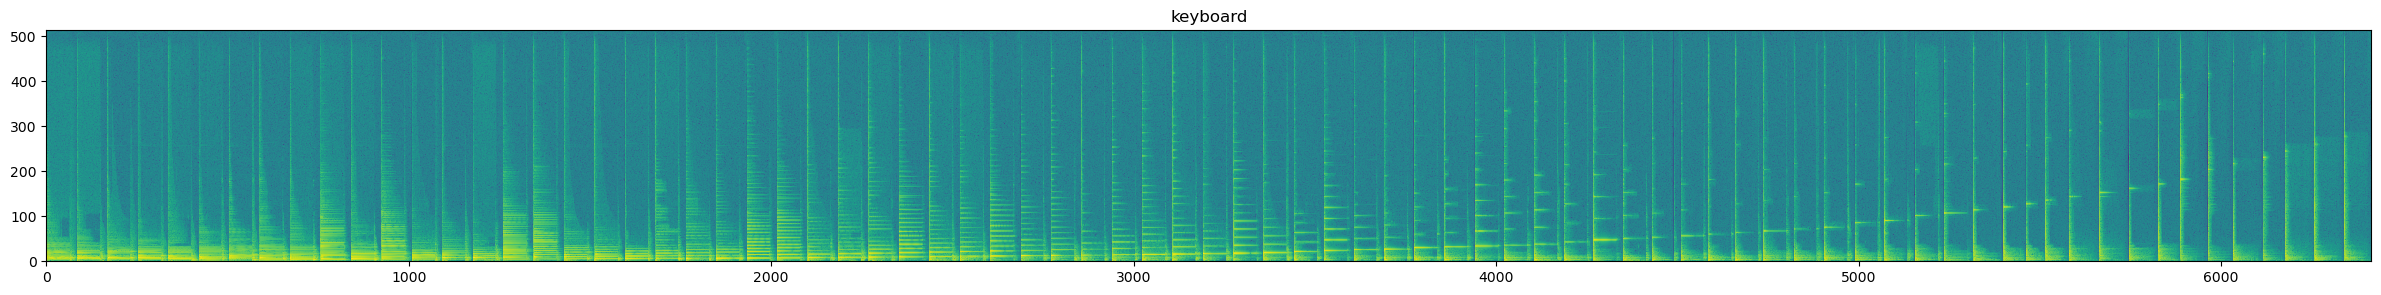

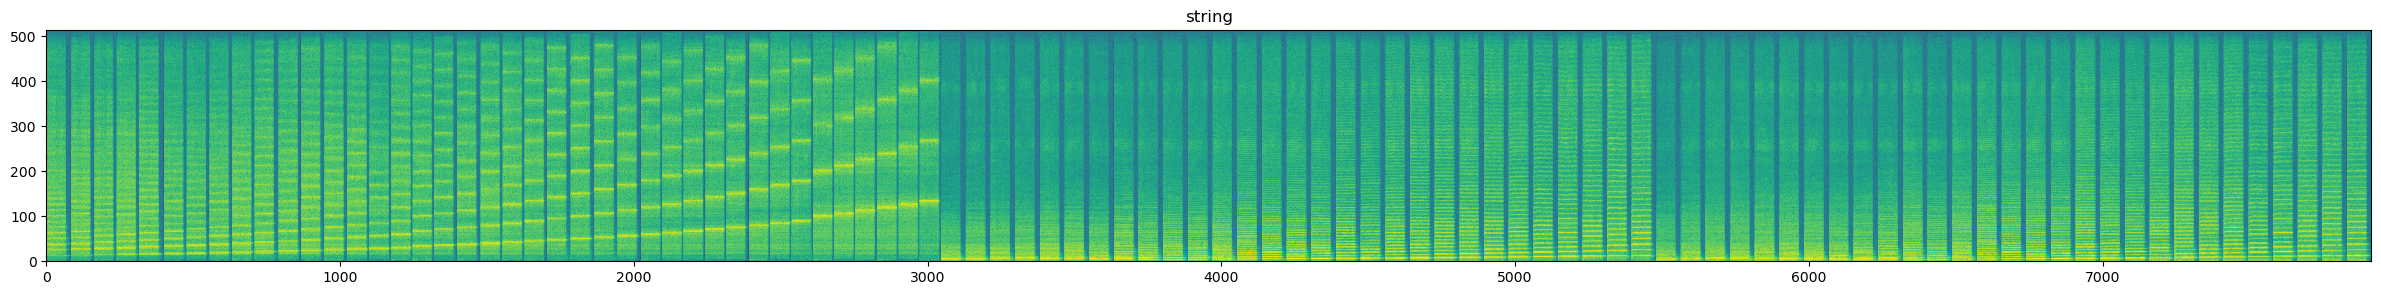

In [3]:
# audioDataset = AudioDataset('nsynth-valid', instruments=['keyboard', 'string', 'brass'], kwargs={'nsynth_getAcousticOnly':True})
audioDataset = AudioDataset('nsynth-valid', instruments=['keyboard', 'string'], kwargs={'nsynth_getAcousticOnly':True})
# audioDataset.normalizeAudioData_()
data = audioDataset.getAudioData()
print(data.keys())
print([len(val) for val in data.values()])

# TODO: When deleting redundant audio data with all NSynth acoustic instruments, the last 3 instruments get completely removed. This may be a bug
audioDataset.deleteRedundantAudioData(pitchInterval=1, writeDebugFiles=True)
data = audioDataset.getAudioData() # data is all float32, but seems the same range
print(data.keys())
print([len(val) for val in data.values()])

# audioDataset.normalizeAudioData_()

audioDataset.setSpectrogramKwargs({'window': 'hann', 'nperseg':1024, 'noverlap':256})
print(audioDataset.getSpectrogramKwargs())

audioDataset.createSpectrogramsIndependent(deleteAudioData=False)

# Display the spectrograms for each instrument before and after low energy pruning
PRUNE_THRESHOLD = 1e-4
audioDataset.displayInstrumentSpectrograms()
# audioDataset.removeLowEnergyFrames_(threshold=10000)
audioDataset.removeLowEnergyFrames_(threshold=PRUNE_THRESHOLD)
audioDataset.displayInstrumentSpectrograms()

audioDataset.writeBasisFunctionAudioFiles()

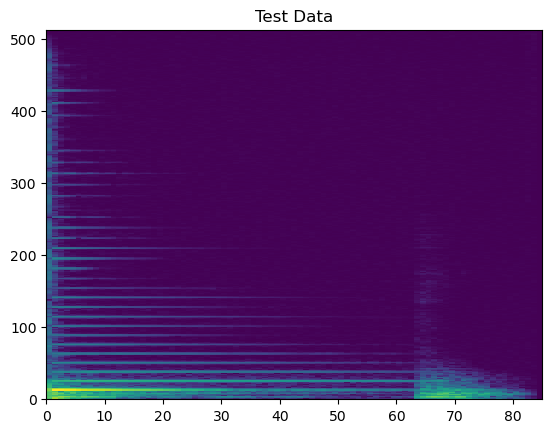

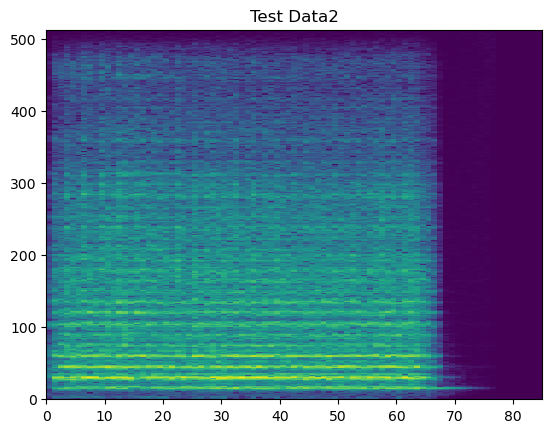

(<matplotlib.collections.QuadMesh at 0x1f223b594b0>,
 Text(0.5, 1.0, 'Test Data2'),
 None)

In [11]:
TEST_FILENAME = r'debug-samples\debugSamplekeyboard_acoustic_004-055-025.wav.wav'
TEST_FILENAME2 = r'debug-samples\debugSamplestring_acoustic_057-058-025.wav.wav'

fs, rawData = wavfile.read(TEST_FILENAME) # read as int16
fs, rawData2 = wavfile.read(TEST_FILENAME2) # read as int16

rawData = normalizeWAV(rawData)
rawData2 = normalizeWAV(rawData2)

mixture = normalizeWAV(rawData + rawData2)
writable = convertFloat32toInt16(mixture)

audioDataset._writeDebugSample(writable, 'Mixture string-piano')

testSpectrogram = audioDataset.getMagnitudeSpectrogram(rawData, fs=fs)
testSpectrogram2 = audioDataset.getMagnitudeSpectrogram(rawData2, fs=fs)

plt.pcolormesh(np.log(testSpectrogram+1e-5)), plt.title('Test Data'), plt.show()
plt.pcolormesh(np.log(testSpectrogram2+1e-5)), plt.title('Test Data2'), plt.show()

In [9]:
IPython.display.Audio(TEST_FILENAME)
IPython.display.Audio(TEST_FILENAME2)